<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Projeto Proposto 
</h1>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Este projeto baseia-se na criação de uma Análise de Imóveis da cidade de Melbourne. </i>       
</p>  

# <font color='red' style='font-size: 40px;'> Problemática </font>
<hr style='border: 2px solid red;'>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i>  Melbourne foi considerada pela revista The Economist por 7 vezes como a melhor cidade do mundo para se viver.Ela fica no estado de Victoria, na Austrália.


</i> 
</p>  

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> No ano de  2018, os imóveis passaram por uma "bolha imobiliária" e o intuito deste projeto é realizar uma Análise de Dados a fim de descobrir causas, procurar tendências e, ao final, criar um Modelo Matemático para entender se previsões teriam auxiliado o cenário na época.
</i> 
</p>  





# <font color='red' style='font-size: 40px;'> Bibliotecas Utilizadas </font>
<hr style='border: 2px solid red;'>

In [86]:
## Bibliotecas De Manipulação de Dados e Visualização
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from IPython.display import display, Image

## Bibliotecas de Modelagem Matemática e Estatística
import numpy as np
import scipy as sp 
import scipy.stats as stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import normaltest
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.diagnostic import lilliefors


# Bibliotecas de Manipulação de Tempo
import time
import datetime

# Bibiliotecas de Seleção de Modelos
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate

# Bibliotecas de Pré-Processamento e Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer

# Bibliotecas de Modelos de Machine Learning
from sklearn.decomposition import PCA

# Bibliotecas de Métricas de Machine Learning


# Parâmetros de Otimização
import warnings
%matplotlib inline
sns.set()
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings

# <font color='red' style='font-size: 40px;'> Funções </font>
<hr style='border: 2px solid red;'>

## Funções de Visualização

* Plota Barras 

In [2]:
def plota_barras(lista_variaveis, hue, df, linhas, colunas, titulo):
    if hue != False:
        if (linhas == 1) and (colunas == 1):
            k = 0
            ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', hue = hue)
            ax.set_title(f'{titulo}')
            ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
            ax.set_ylabel(f'Quantidade', fontsize = 14)
            total = []
            for bar in ax.patches:
                height = bar.get_height()
                total.append(height)
            total = sum(total)
            
            sizes = []
            for bar in ax.patches:
                height = bar.get_height()
                sizes.append(height)
                ax.text(bar.get_x() + bar.get_width()/1.6,
                        height+200,
                        f'{round((height/total)*100, 2)}%',
                        ha = 'center',
                        fontsize = 12
                )
            ax.set_ylim(0, max(sizes)*1.1)
            plt.show()
        elif linhas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            fig.suptitle(f'titulo')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[j], hue = hue)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1
        elif colunas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            fig.suptitle(f'titulo')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i], hue = hue)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1
        else: 
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            fig.suptitle(f'titulo')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i, j], hue = hue)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1
    else:
        if (linhas == 1) and (colunas == 1):
            k = 0
            ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', color='#1FB3E5')
            ax.set_title(f'{titulo}')
            ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
            ax.set_ylabel(f'Quantidade', fontsize = 14)
            total = []
            for bar in ax.patches:
                height = bar.get_height()
                total.append(height)
            total = sum(total)
            
            sizes = []
            for bar in ax.patches:
                height = bar.get_height()
                sizes.append(height)
                ax.text(bar.get_x() + bar.get_width()/1.6,
                        height+200,
                        f'{round((height/total)*100, 2)}%',
                        ha = 'center',
                        fontsize = 12
                )
            ax.set_ylim(0, max(sizes)*1.1)
            plt.show()

        elif linhas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[j], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1
        elif colunas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1
        else:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i, j], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1


* Plota Histogramas 

In [3]:
def plota_histograma(lista_variaveis, df, linhas, colunas, titulo):
    if (linhas == 1) and (colunas == 1): 
        k = 0
        mediana = df[lista_variaveis[k]].median()
        media = round(df[lista_variaveis[k]].mean(), 2)
        plt.figure(figsize = (14, 4))
        ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', bins = 30)
        ax.set_title(f'{titulo}')
        ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
        ax.set_ylabel(f'Frequência', fontsize = 14)
        ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
        ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
        plt.ticklabel_format(style='plain')
        plt.legend(loc = 'best')
        plt.show()
    elif linhas == 1:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 4), sharey = True)
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                mediana = df[lista_variaveis[k]].median()
                media = round(df[lista_variaveis[k]].mean(), 2)
                ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[j], bins = 30)
                ax.set_title(f'{titulo}')
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
                ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
                ax.ticklabel_format(style='plain')
                ax.legend(loc = 'best')
                k = k + 1
    elif colunas == 1:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 4), sharey = True)
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                mediana = df[lista_variaveis[k]].median()
                media = round(df[lista_variaveis[k]].mean(), 2)
                ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i], bins = 30)
                ax.set_title(f'{titulo}')
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
                ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
                ax.ticklabel_format(style='plain')
                ax.legend(loc = 'best')
                k = k + 1
    else:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 4), sharey = True)
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                mediana = df[lista_variaveis[k]].median()
                media = round(df[lista_variaveis[k]].mean(), 2)
                ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i, j], bins = 30)
                ax.set_title(f'{titulo}')
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
                ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
                ax.ticklabel_format(style='plain')
                ax.legend(loc = 'best')
                k = k + 1

* Plota Boxplot

In [4]:
def plota_boxplot(lista_variaveis, df, linhas, colunas, titulo):
    if (linhas == 1) and (colunas == 1): 
        k = 0
        plt.figure(figsize = (14, 4))
        ax = sns.boxplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', orient = 'h')
        ax.set_title(f'{titulo}')
        ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
        ax.set_ylabel(f'Frequência', fontsize = 14)
        plt.show()
    elif linhas == 1:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 4), sharey = True)
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                ax = sns.boxplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[j], orient = 'h')
                ax.set_title(f'{titulo}')
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                k = k + 1
    elif colunas == 1:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 4), sharey = True)
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                ax = sns.boxplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i], orient = 'h')
                ax.set_title(f'{titulo}')
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                k = k + 1
    else:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 4), sharey = True)
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                ax = sns.boxplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i, j], orient = 'h')
                ax.set_title(f'{titulo}')
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                k = k + 1

* Plota Dispersão

In [66]:
def plota_dispersao(x, y, dados):
    plt.figure(figsize = (14, 4))
    plt.scatter(data = dados, x = x, y = y, color='#1FB3E5', s = 10, alpha = 0.50, marker = '.')
    plt.title(f'Gráfico de Dispersão entre {x} e {y}', fontsize = 14)
    plt.xlabel(f'{x}', fontsize = 14)
    plt.ylabel(f'{y}', fontsize = 14)
    plt.grid(False)
    plt.box(False)
    plt.ticklabel_format(style='plain')
    plt.legend(loc = 'best')
    plt.show()

## Funções de Estatística

* Analisa Correlação

In [5]:
def analisa_correlacao(metodo, df):
    plt.figure(figsize = (14, 7))
    sns.heatmap(df.corr(method = metodo), vmin = -1, vmax = 1, cmap = 'magma', annot = True)
    plt.title(f"Analisando Correlação de {metodo}")
    plt.grid(False)
    plt.box(False)
    plt.tight_layout()
    plt.show()

* Analisa Normalidade 

In [77]:
def analisa_normalidade(amostra1, amostra2, variavel):

    normaltest_amostra_1 = normaltest(amostra1[variavel])
    normaltest_amostra_2 = normaltest(amostra2[variavel])

    if (normaltest_amostra_1[1] < 0.05 ) and (normaltest_amostra_2[1] < 0.05):
        print(f'Pelo Teste de Hipótese, A Hipótese Nula de que a variável "{variavel}" segue uma Distribuição Normal é REJEITADA!')
    else:
        print(f'Pelo Teste de Hipótese, A Hipótese Nula de  que a variável "{variavel}" segue uma Distribuição Normal é ACEITA')

    ax1 = plt.subplot(121)
    stats.probplot(amostra1[variavel], dist = 'norm', plot = plt)
    plt.title(f'Amostra 1', fontsize = 14)
    plt.grid(False)
    plt.box(False)
    plt.tight_layout()
    ax1 = plt.subplot(122)
    stats.probplot(amostra2[variavel], dist = 'norm', plot = plt)
    plt.title(f'Amostra 2', fontsize = 14)
    plt.grid(False)
    plt.box(False)
    plt.tight_layout()

    
    plt.show()



* Teste de Hipótese para Duas Amostras Independentes 

In [7]:
def teste_hipotese_duas_amostras_independentes(parametrico, amostra1, amostra2, variavel):

    media_amostra_1 = amostra1[variavel].mean()
    media_amostra_2 = amostra2[variavel].mean()
    mediana_amostra_1 = amostra1[variavel].median()
    mediana_amostra_2 = amostra2[variavel].median()

    if parametrico == True: 
        print(f'Média Amostra 1: {media_amostra_1}')
        print(f'Média Amostra 2: {media_amostra_2}')
        stat, p_value = ztest(amostra1[variavel], amostra2[variavel]) 
        if p_value > 0.05:
            print(f'Pelo Teste de Hipótese Z, não há diferença significativa entre as médias da Amostra 1 e Amostra 2')
        else:
            print(f'Pelo Teste de Hipótese Z, há diferença significativa entre as médias da Amostra 1 e Amostra 2')
    else:
        print(f'Mediana Amostra 1: {mediana_amostra_1}')
        print(f'Mediana Amostra 2: {mediana_amostra_2}')
        stat, p_value = stats.mannwhitneyu(amostra1[variavel], amostra2[variavel]) 
        if p_value > 0.05:
            print(f'Pelo Teste de Hipótese de Mann Whitney, não há diferença significativa entre as medianas da Amostra 1 e Amostra 2')
        else:
            print(f'Pelo Teste de Hipótese de Mann Whitney, há diferença significativa entre as medianas da Amostra 1 e Amostra 2')

## Funções de Pré-Processamento

* Funções de Tempo 

In [8]:
def cria_features_de_data(dados):
    dados['data_de_venda'] = pd.to_datetime(dados['data_de_venda'])
    dados['dia'] = dados['data_de_venda'].dt.day 
    dados['dia'] = dados['dia'].apply(lambda x:str(x))

    dados['mes'] = dados['data_de_venda'].dt.month
    dados['mes'] = dados['mes'].apply(lambda x:str(x))

    dados['ano'] = dados['data_de_venda'].dt.year
    dados['ano'] = dados['ano'].apply(lambda x:str(x))
    dados.sort_values(by = 'data_de_venda', ascending = True, inplace = True)

* Separa entre Treino e Teste com Divisão Temporal

In [9]:
def separa_treino_teste_temporal(data, data_teste, dados):
    dados.sort_values(by = data, ascending = True, inplace = True)
    df_train = dados.loc[dados[data] < data_teste]
    df_test = dados.loc[dados[data] >= data_teste]

    return df_train, df_test

# <font color='red' style='font-size: 40px;'> 1) Entendimento da Base de Dados </font>
<hr style='border: 2px solid red;'>

## 1.1) Definição dos Campos

> 1. preco: Preço de venda.

> 2. endereco: Endereço que a residência encontra-se.

> 3. bairro: Bairro que a residência encontra-se.

> 4. zona_urbana: Zona Urbana que a residência se encontra.

> 5. qt_casas_bairro: Quantidade de residências presentes no Bairro.

> 6. tipo_de_imovel: Definição do tipo de residência.

> 7. numero_de_quartos: Quantidade de quartos.

> 8. numero_de_banheiros: Quantidade de banheiros.

> 9. numero_de_vagas: Quantidade de vagas para veículos.

> 10. area_do_terreno: Área do terreno.

> 11. tamanho_da_construcao: Tamanho da construção.

> 12. distancia_centro_urbano: Distância ate o Centro Urbano.

> 13. data_de_venda: Ano que a residência foi vendida.



In [10]:
df_raw = pd.read_csv('./data/MELBOURNE_HOUSE_PRICES.csv')
print(df_raw.shape)
print(df_raw.columns)
df_raw.head()

(34857, 13)
Index(['preco', 'endereco', 'bairro', 'zona_urbana', 'qt_casas_bairro',
       'tipo_de_imovel', 'numero_de_quartos', 'numero_de_banheiros',
       'numero_de_vagas', 'area_do_terreno', 'tamanho_da_construcao',
       'distancia_centro_urbano', 'data_de_venda'],
      dtype='object')


,preco,endereco,bairro,zona_urbana,qt_casas_bairro,tipo_de_imovel,numero_de_quartos,numero_de_banheiros,numero_de_vagas,area_do_terreno,tamanho_da_construcao,distancia_centro_urbano,data_de_venda
0,NaN,68 Studley St,Abbotsford,NorteMetrop,4019.00,casa,2,1.00,1.00,126.00,NaN,2.50,2016-09-03
1,1480000.00,85 Turner St,Abbotsford,NorteMetrop,4019.00,casa,2,1.00,1.00,202.00,NaN,2.50,2016-12-03
2,1035000.00,25 Bloomburg St,Abbotsford,NorteMetrop,4019.00,casa,2,1.00,0.00,156.00,79.00,2.50,2016-02-04
3,NaN,18/659 Victoria St,Abbotsford,NorteMetrop,4019.00,apartamento,3,2.00,1.00,0.00,NaN,2.50,2016-02-04
4,1465000.00,5 Charles St,Abbotsford,NorteMetrop,4019.00,casa,3,2.00,0.00,134.00,150.00,2.50,2017-03-04


## 1.2) Tipo das Variáveis

In [11]:
categoricas = [column for column in df_raw.columns if df_raw[column].dtype.name == 'object']
numericas = [column for column in df_raw.columns if (df_raw[column].dtype.name == 'int64') or (df_raw[column].dtype.name == 'float64')]

print(f'Colunas Categóricas: {categoricas}')
print()
print(f'Colunas Quantitativas: {numericas}')

Colunas Categóricas: ['endereco', 'bairro', 'zona_urbana', 'tipo_de_imovel', 'data_de_venda']

Colunas Quantitativas: ['preco', 'qt_casas_bairro', 'numero_de_quartos', 'numero_de_banheiros', 'numero_de_vagas', 'area_do_terreno', 'tamanho_da_construcao', 'distancia_centro_urbano']


## 1.3) Conferindo os Dados

In [12]:
df_raw.isnull().sum()

preco                       7610
endereco                       0
bairro                         0
zona_urbana                    3
qt_casas_bairro                3
tipo_de_imovel                 0
numero_de_quartos              0
numero_de_banheiros         8226
numero_de_vagas             8728
area_do_terreno            11810
tamanho_da_construcao      21115
distancia_centro_urbano        1
data_de_venda                  0
dtype: int64

## 1.3) Criando novo DataFrame

> 1. Para evitar Data Lekage (vazamento de dados nas demais etapas), realizou-se a separação entre Treino e Teste desde o início a fim de simular uma situação da vida real.

> 2. Pelo fato de ser um problema que envolve Séries Temporais, essa separação será realizada de acordo com a Data de Venda.

In [13]:
# Criando Novas Variáveis de Data para realizar a Separação entre Validação e Produção
df_trusted = df_raw.copy()
cria_features_de_data(df_trusted)
df_trusted.head()


,preco,endereco,bairro,zona_urbana,qt_casas_bairro,tipo_de_imovel,numero_de_quartos,numero_de_banheiros,numero_de_vagas,area_do_terreno,tamanho_da_construcao,distancia_centro_urbano,data_de_venda,dia,mes,ano
10128,1205000.00,999A Riversdale Rd,Surrey Hills,SulMetrop,5457.00,casa,3,1.00,2.00,490.00,NaN,11.20,2016-01-28,28,1,2016
10127,813000.00,1/10 Florence Rd,Surrey Hills,SulMetrop,5457.00,apartamento,2,1.00,2.00,108.00,NaN,11.20,2016-01-28,28,1,2016
2866,NaN,140 Canterbury Rd,Canterbury,SulMetrop,3265.00,casa,4,2.00,0.00,808.00,198.00,9.00,2016-01-28,28,1,2016
6526,560000.00,6 Kynoch La,Maribyrnong,OesteMetrop,4918.00,t,3,2.00,2.00,77.00,115.00,8.70,2016-02-04,4,2,2016
8734,NaN,7/15 River Bvd,Richmond,NorteMetrop,14949.00,apartamento,2,2.00,1.00,0.00,NaN,2.60,2016-02-04,4,2,2016


In [14]:
# Dados de Treinamento Verdadeiros (dados até 2018-02)
df_train = separa_treino_teste_temporal('data_de_venda', '2018-03-01', df_trusted)[0]
# Dados de Teste Verdadeiros (dados de 2018-03)
df_test = separa_treino_teste_temporal('data_de_venda', '2018-03-01', df_trusted)[1]

print(f'Dataset Original: {df_raw.shape}')
print(f'Dataset Treino: {df_train.shape}')
print(f'Dataset Teste: {df_test.shape}')


Dataset Original: (34857, 13)
Dataset Treino: (32873, 16)
Dataset Teste: (1984, 16)


# <font color='red' style='font-size: 40px;'> 2.0 Análise Exploratória  - Foco em Análises Univariadas </font>
<hr style='border: 2px solid red;'>

## 2.1) Analisando a Confiabilidade

In [15]:
display(df_train.isnull().sum())
df_train.head()

preco                       7147
endereco                       0
bairro                         0
zona_urbana                    3
qt_casas_bairro                3
tipo_de_imovel                 0
numero_de_quartos              0
numero_de_banheiros         7656
numero_de_vagas             8099
area_do_terreno            11238
tamanho_da_construcao      19774
distancia_centro_urbano        1
data_de_venda                  0
dia                            0
mes                            0
ano                            0
dtype: int64

,preco,endereco,bairro,zona_urbana,qt_casas_bairro,tipo_de_imovel,numero_de_quartos,numero_de_banheiros,numero_de_vagas,area_do_terreno,tamanho_da_construcao,distancia_centro_urbano,data_de_venda,dia,mes,ano
10128,1205000.00,999A Riversdale Rd,Surrey Hills,SulMetrop,5457.00,casa,3,1.00,2.00,490.00,NaN,11.20,2016-01-28,28,1,2016
10127,813000.00,1/10 Florence Rd,Surrey Hills,SulMetrop,5457.00,apartamento,2,1.00,2.00,108.00,NaN,11.20,2016-01-28,28,1,2016
2866,NaN,140 Canterbury Rd,Canterbury,SulMetrop,3265.00,casa,4,2.00,0.00,808.00,198.00,9.00,2016-01-28,28,1,2016
2,1035000.00,25 Bloomburg St,Abbotsford,NorteMetrop,4019.00,casa,2,1.00,0.00,156.00,79.00,2.50,2016-02-04,4,2,2016
3,NaN,18/659 Victoria St,Abbotsford,NorteMetrop,4019.00,apartamento,3,2.00,1.00,0.00,NaN,2.50,2016-02-04,4,2,2016


#### 1. Nota-se que há diversos campos com valores ausentes.

#### 2. Como o intuito de uma Análise Exploratória é justamente entender os dados existentes, não deve-se realizar nenhum tipo de preenchimento nesta etapa.

## 2.2) Análise Geográfica 

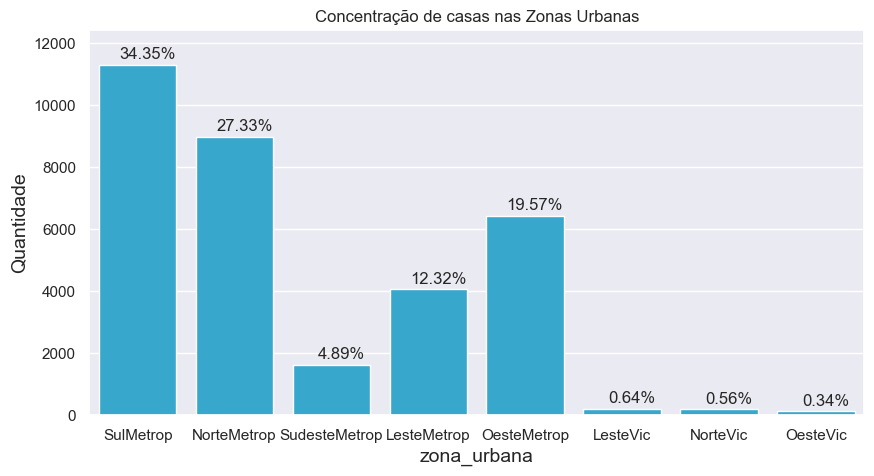

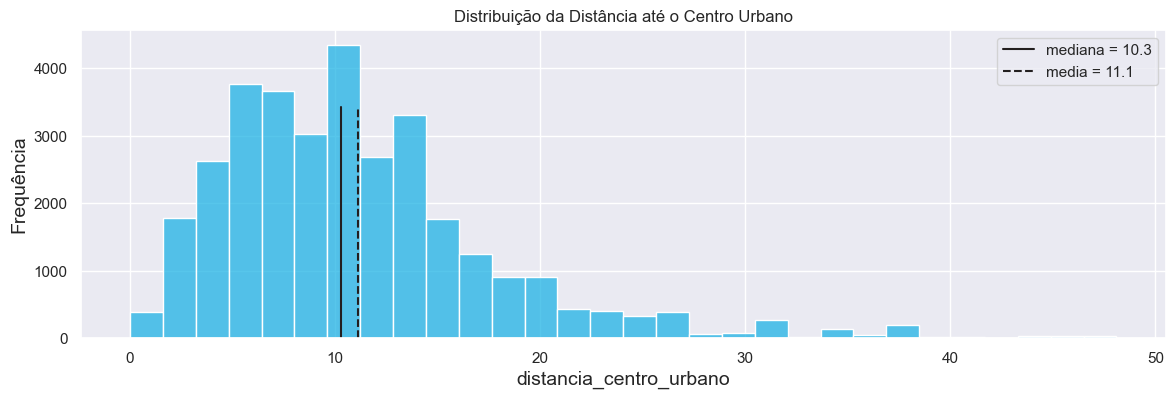

In [16]:
plota_barras(['zona_urbana'], False, df_train, 1, 1, 'Concentração de casas nas Zonas Urbanas')
plota_histograma(['distancia_centro_urbano'], df_train, 1, 1, 'Distribuição da Distância até o Centro Urbano')

#### 1. Nota-se grande concentração na região metropolitana, portanto, a maioria das casas também possui distâncias menores até o Centro Urbano.

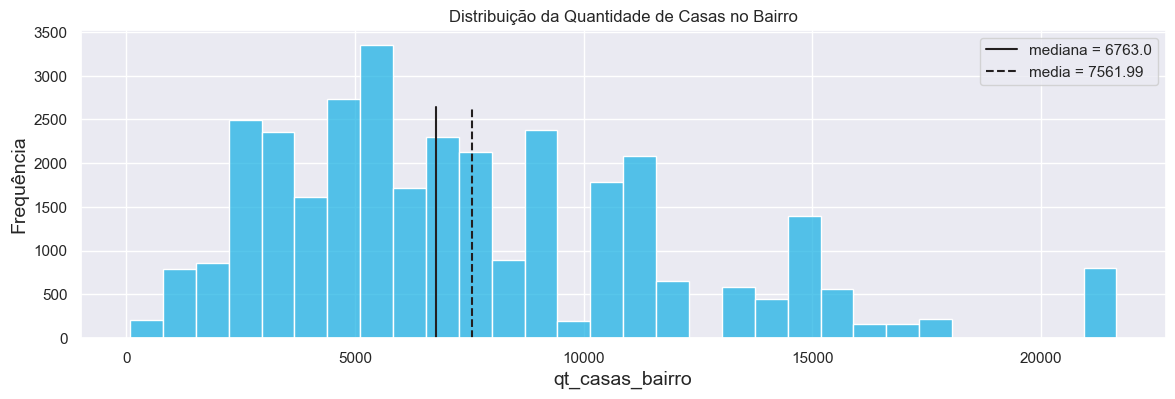

In [17]:
plota_histograma(['qt_casas_bairro'], df_train, 1, 1, 'Distribuição da Quantidade de Casas no Bairro')

#### 1. A maioria dos bairros está localizada em regiões populosas, com alguns Outliers estando em regiões com alta concentração de residências.

## 2.3) Análise das Características do Imóvel


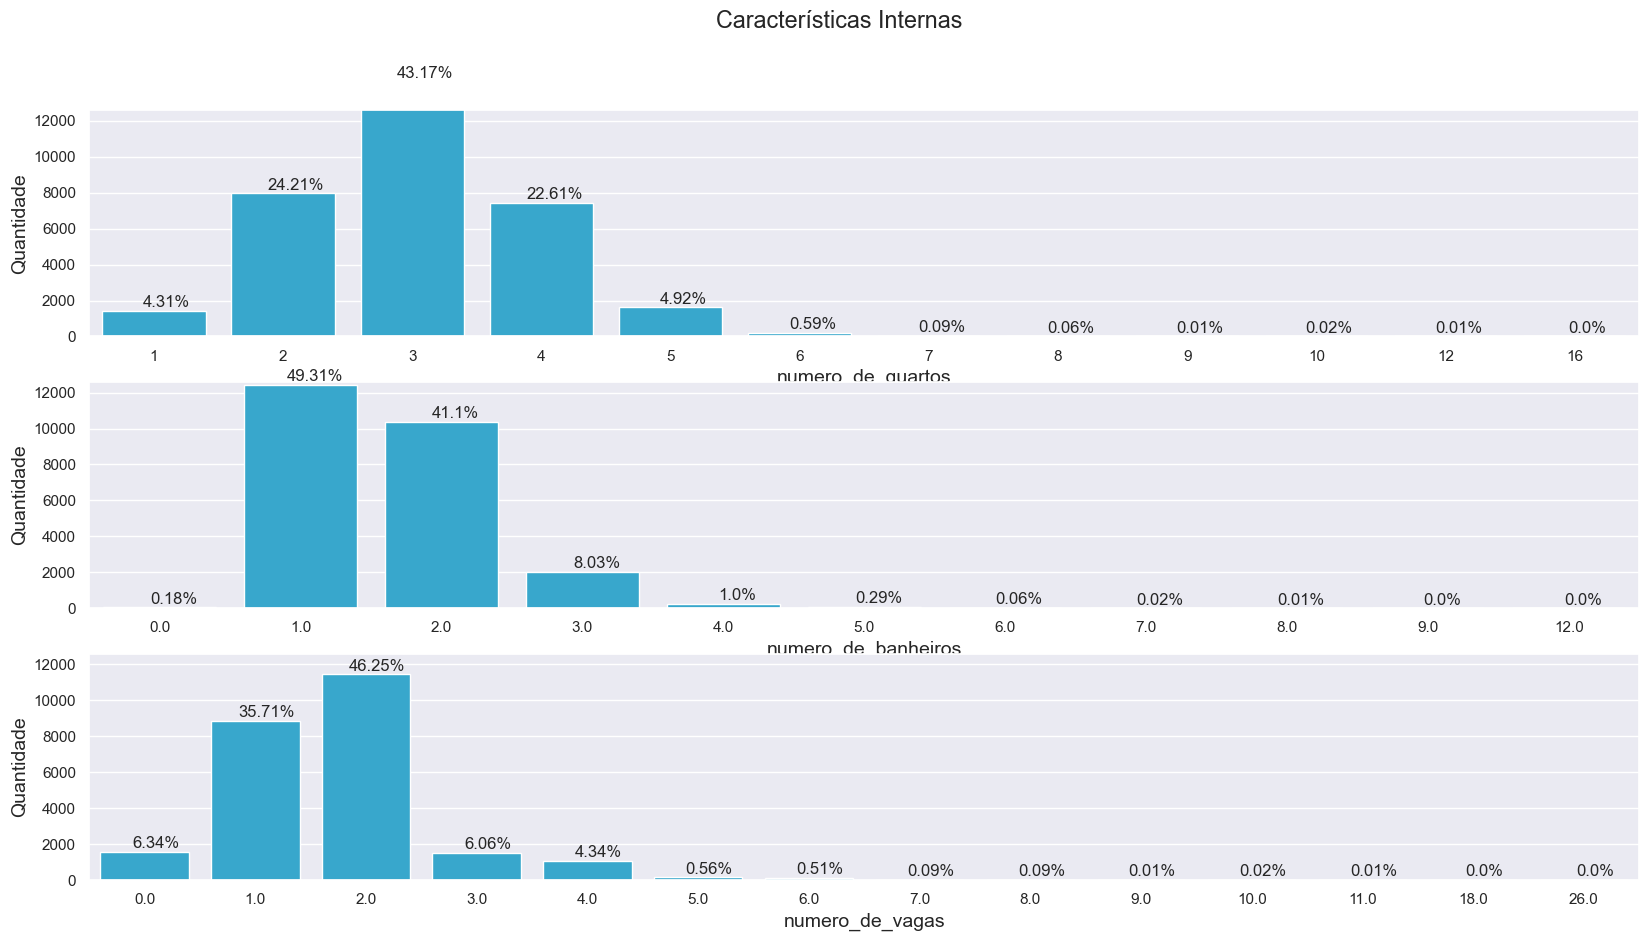

In [18]:
plota_barras(['numero_de_quartos', 'numero_de_banheiros', 'numero_de_vagas'], False, df_train, 3, 1, 'Características Internas')

#### 1. Muitos imóveis possuem entre 2 a 4 quartos, 1 ou 2 banheiros e geralmente possuem 1 ou 2 vagas.

#### 2. Há exceções dentro do padrão de um imóvel contudo, há a presença de alguns Outliers com muitos quartos, ou muitos banheiros ou muitas vagas.

,area_do_terreno,tamanho_da_construcao
count,21635.00,13099.00
mean,592.78,1571.25
std,3496.50,84227.87
min,0.00,0.00
1%,0.00,4.00
5%,0.00,55.00
10%,0.00,72.00
25%,215.00,101.00
50%,509.00,135.00
75%,669.00,186.00


Quantidade de registros excluídos na Análise de Área do Terreno: 109
Quantidade de registros excluídos na Análise de Tamanho da Construção: 66


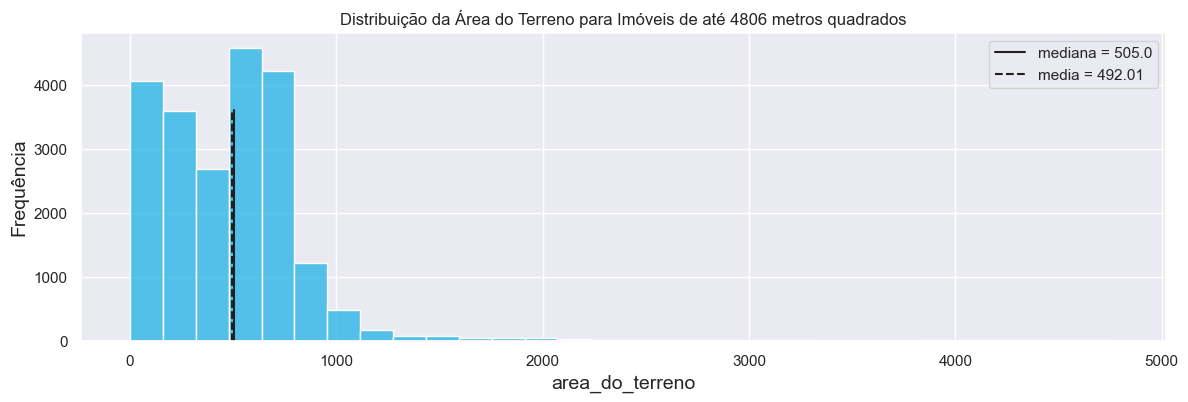

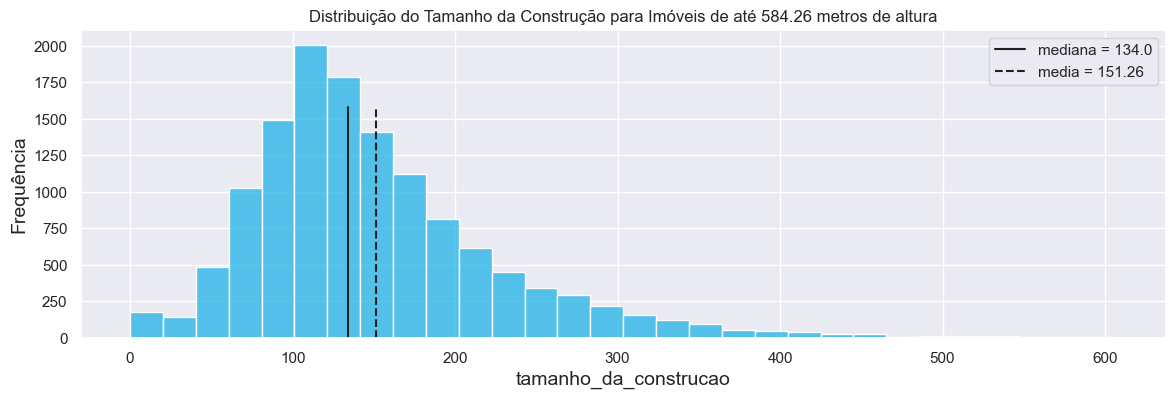

In [19]:
display(df_train[['area_do_terreno', 'tamanho_da_construcao']].describe(percentiles = [0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 0.9, 0.99, 0.995]))
print(f'Quantidade de registros excluídos na Análise de Área do Terreno: {df_train.loc[df_train.area_do_terreno > 4785.15].shape[0]}')
print(f'Quantidade de registros excluídos na Análise de Tamanho da Construção: {df_train.loc[df_train.tamanho_da_construcao > 610.06].shape[0]}')

plota_histograma(['area_do_terreno'], df_train.loc[df_train.area_do_terreno <= 4785.15], 1, 1, 'Distribuição da Área do Terreno para Imóveis de até 4806 metros quadrados')
plota_histograma(['tamanho_da_construcao'], df_train.loc[df_train.tamanho_da_construcao <= 610.06], 1, 1, 'Distribuição do Tamanho da Construção para Imóveis de até 584.26 metros de altura')

#### 1. Para a análise de área e tamanho dos imóveis, optou-se por remover 0.05% da base de dados que prejudicaria a escala dos gráficos e análise em geral.

#### 2. Após a exclusão desta pequena parcela de registros, observa-se que a grande maioria dos imóveis possuem uma Área até $1000m^2$ e tamanho de até $300m$.

#### 3. Ainda sim, é importante deixar claro que há imóveis que superam estas características e, na hora da Modelagem, serão considerados.

## 2.4) Análise das Características de Venda

,preco
count,25726.00
mean,1048585.88
std,640139.81
min,85000.00
1%,310000.00
5%,411125.00
10%,485000.00
25%,635000.00
50%,870000.00
75%,1292750.00


Quantidade de registros excluídos na Análise de Área do Terreno: 127


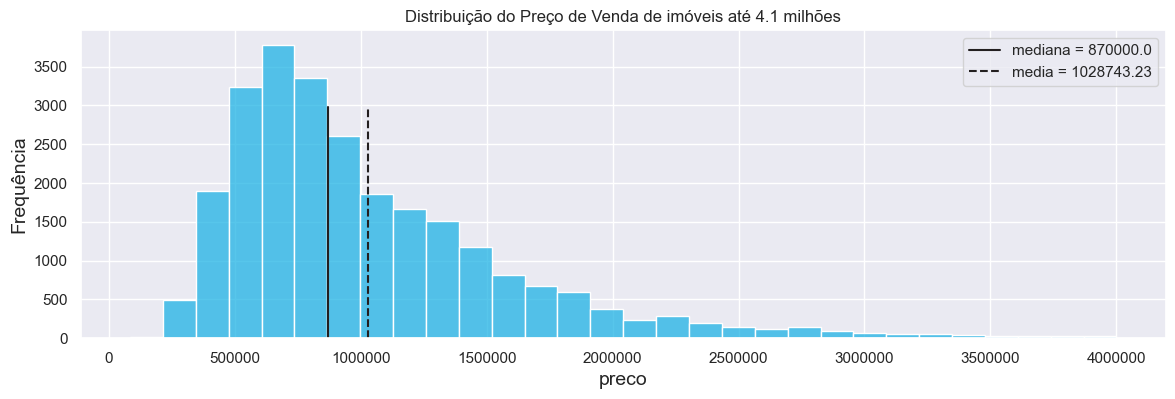

In [20]:
display(df_train[['preco']].describe(percentiles = [0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 0.9, 0.99, 0.995]))
print(f'Quantidade de registros excluídos na Análise de Área do Terreno: {df_train.loc[df_train.preco > 4000000].shape[0]}')
plota_histograma(['preco'], df_train.loc[df_train.preco <= 4000000], 1, 1, 'Distribuição do Preço de Venda de imóveis até 4.1 milhões')

#### 1. Para a análise de área e tamanho dos imóveis, optou-se por remover 0.05% da base de dados que prejudicaria a escala dos gráficos e análise em geral.

#### 2. Após a exclusão desta pequena parcela de registros, observa-se que a grande maioria dos imóveis foram vendidos entre 500 mil a 2 milhões, podendo chegar até 4 milhões.

#### 3. Ainda sim, é importante deixar claro que há imóveis que superam estas características e, na hora da Modelagem, serão considerados.

# <font color='red' style='font-size: 40px;'> 3.0 Análise Exploratória - Foco em Análises Bivariadas </font>
<hr style='border: 2px solid red;'>

## 3.1) Análise de Correlações 

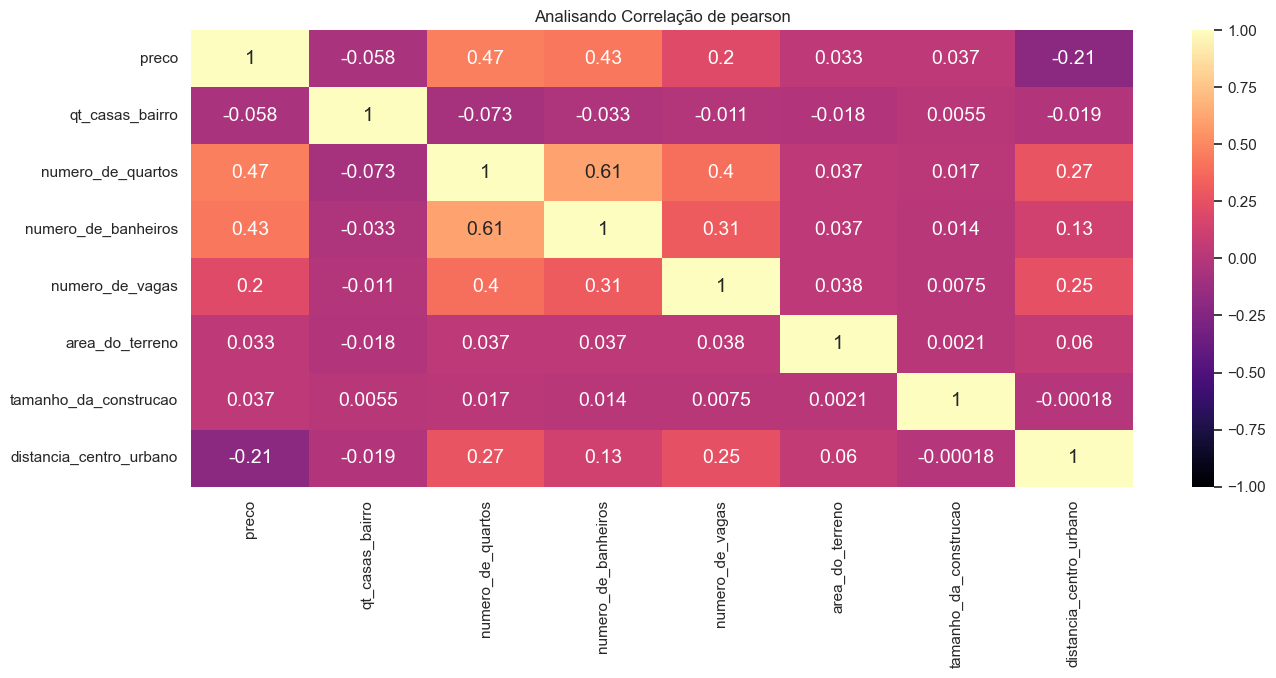

In [21]:
analisa_correlacao('pearson', df_train)

#### 1. Através do gráfico de correlações, nota-se uma correlação linear positiva entre número de quartos, banheiros e vagas com a variável preço, contudo, sem tanta expressão. Isso significa que conforme o número dessas característica aumenta, o preço tende a aumentar mas de forma não tão agressiva.

#### 2. O mesmo ocorre com a distancia até o Centro Urbano, todavia, é uma correlação linear negativa.

#### 3. As demais variáveis aparentemente não tem uma relação linear muito forte com a variável preço.

## 3.2) Residências bem localizadas (perto do Centro Urbano) possuem um preço significativamente maior que casas mais afastadas?

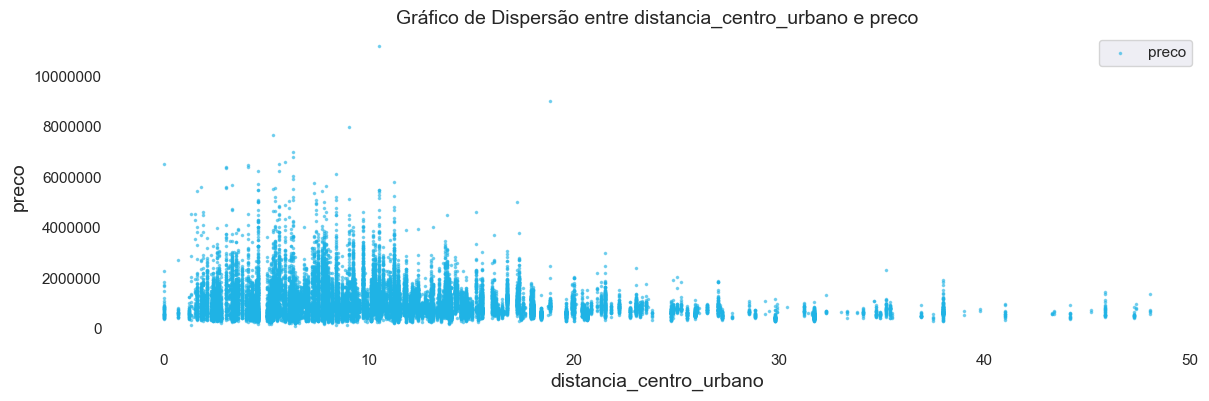

In [65]:
plota_dispersao('distancia_centro_urbano', 'preco', df_train)

#### 1. Graficamente, nota-se a concentração de preços mais elevados conforme a distância até o centro urbano diminui.

Pelo Teste de Hipótese, A Hipótese Nula de que a variável "preco" segue uma Distribuição Normal é REJEITADA!


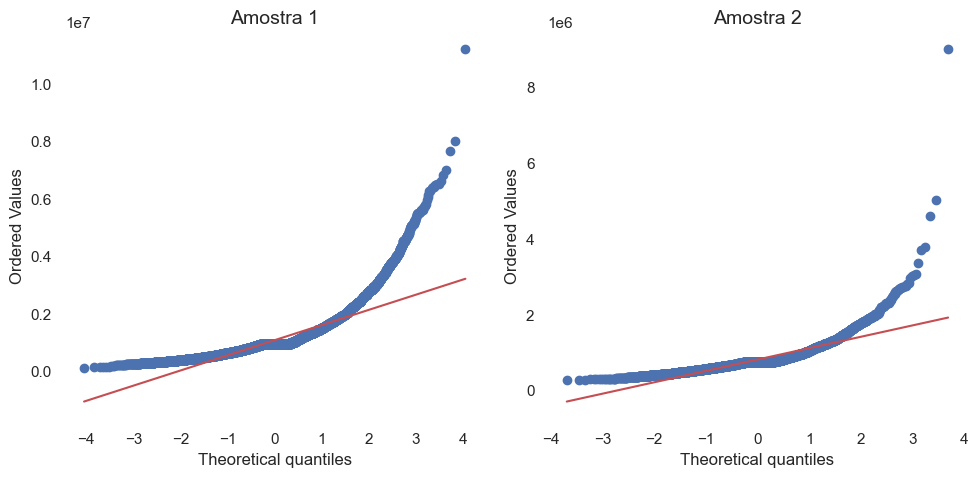

Mediana Amostra 1: 920000.0
Mediana Amostra 2: 725000.0
Pelo Teste de Hipótese de Mann Whitney, há diferença significativa entre as medianas da Amostra 1 e Amostra 2


In [95]:
df_centro_urbano = df_train[['preco', 'distancia_centro_urbano']].copy()
df_centro_urbano['flag_perto_centro_urbano'] = np.where(df_centro_urbano['distancia_centro_urbano'] < 15, 'Yes', 'No')

df_perto_centro_urbano = df_centro_urbano.loc[df_centro_urbano.flag_perto_centro_urbano == 'Yes'].copy()
df_perto_centro_urbano.fillna(df_perto_centro_urbano.preco.median(), inplace = True)

df_longe_centro_urbano = df_centro_urbano.loc[df_centro_urbano.flag_perto_centro_urbano == 'No'].copy()
df_longe_centro_urbano.fillna(df_longe_centro_urbano.preco.median(), inplace = True)

analisa_normalidade(df_perto_centro_urbano, df_longe_centro_urbano, 'preco')
teste_hipotese_duas_amostras_independentes(False, df_perto_centro_urbano, df_longe_centro_urbano, 'preco')


#### 1. Nota-se que a variável 'Preço' não segue Distribuição Normal, portanto, aplicou-se um Teste Não-Paramétrico.

#### 2. Pelo Teste de Hipótese, confirmou-se que a diferença é significativa, portanto, imóveis pertos do centro urbano tendem a ter preços maiores. 

## 3.3) Residências em diferentes Zonas Urbanas possuem preços significativamente diferentes?

## 3.4) Residências com maior Área possuem preços significativamente maiores?

## 3.5) Residências com um Tamanho de Construção maior possuem preços significativamente maiores?


## 3.6) Houve mudanças significativas de preço com o passar dos Anos?

## 3.7) Qual o comportamento dos preços em relação aos Meses? Há algum tipo de tendência, sazonalidade, autocorrelação ou é uma série estacionária?

# <font color='red' style='font-size: 40px;'> 4.0 Pré-Processamento </font>
<hr style='border: 2px solid red;'>

# <font color='red' style='font-size: 40px;'> 5.0 Aplicação de Modelos de Machine Learning </font>
<hr style='border: 2px solid red;'>

# <font color='red' style='font-size: 40px;'> 6.0 Consolidação dos Resultados </font>
<hr style='border: 2px solid red;'>